## <font size=5> <strong>Heart Disease Prediction using Different Models(Classification) and their Comparison


## I. Importing essential libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


## II. Importing and understanding our dataset

In [111]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [112]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [113]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [114]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0


#### Description

In [116]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Luckily, we have no missing values

#### Let's understand our columns better:

In [118]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [119]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [120]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [121]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


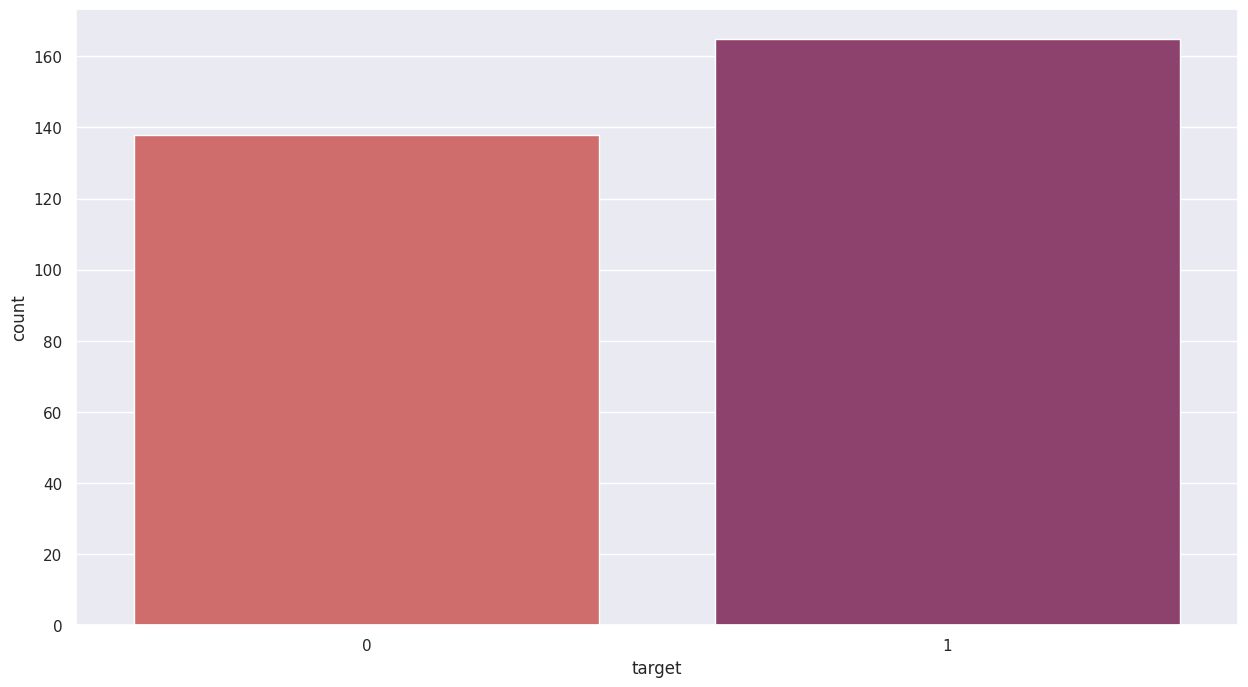

In [122]:
y = dataset["target"]

sns.countplot(x=y,palette="flare")


target_temp = dataset.target.value_counts()

print(target_temp)

In [123]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


###Plotting a correlation matrix to check for redundancy error

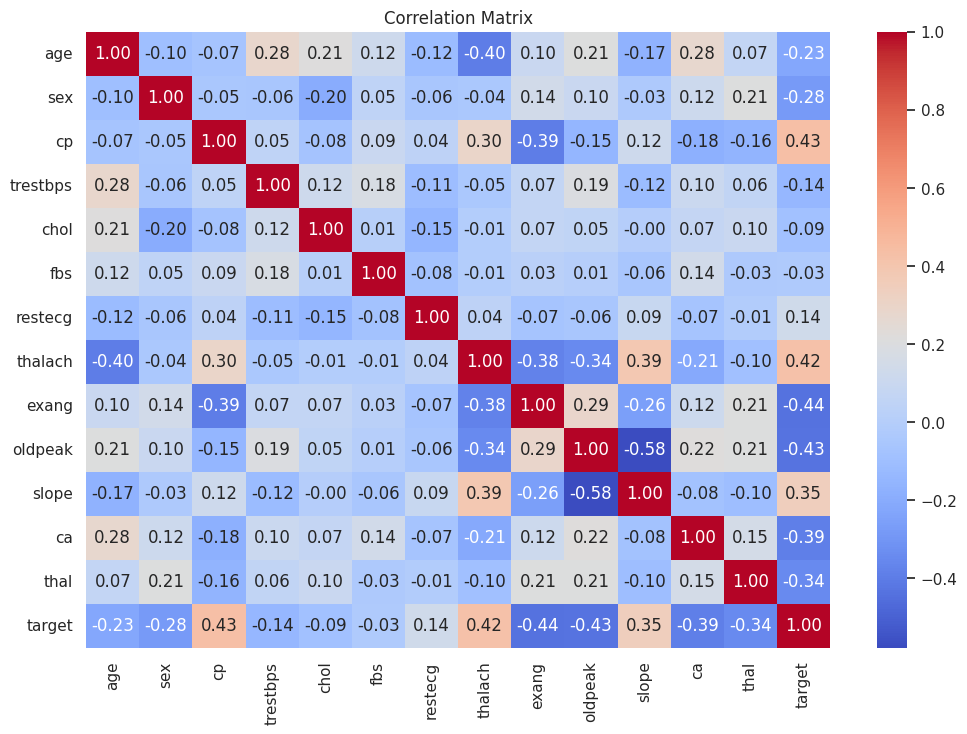

In [124]:
corr_matrix = dataset.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features only as they are categorical rest are continuos

### Analysing the 'Sex' feature

In [125]:
dataset["sex"].unique()

array([1, 0])

We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

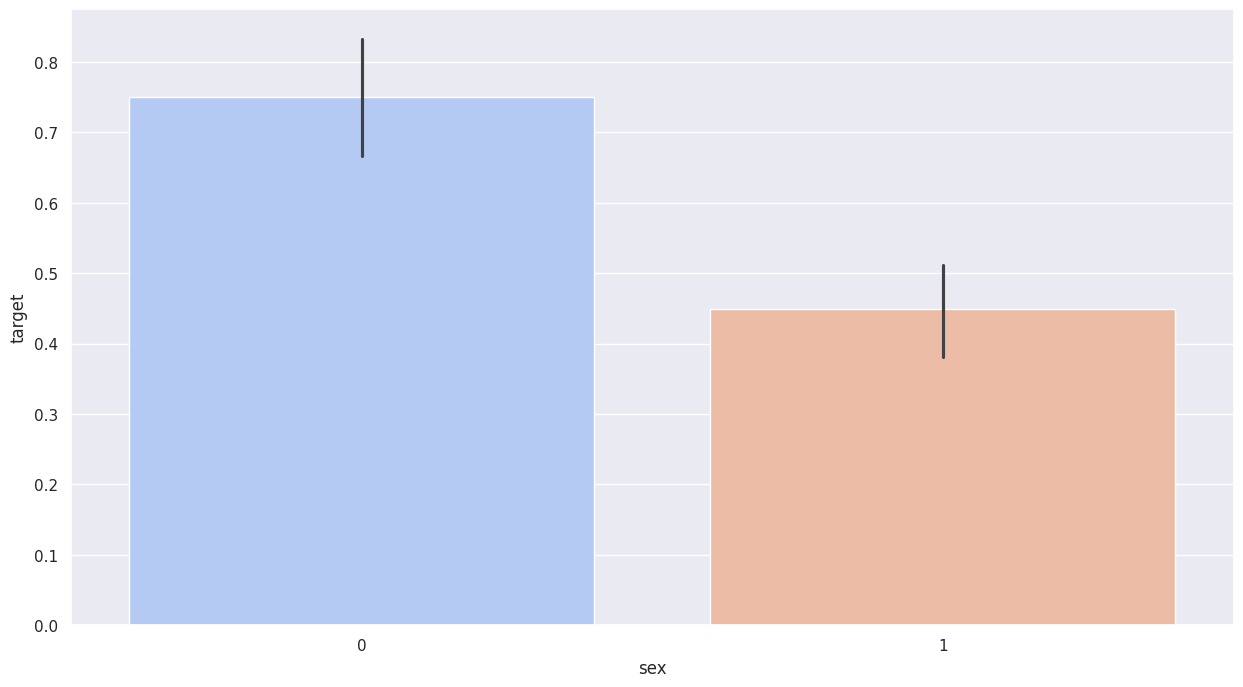

In [126]:
sns.barplot(x=dataset["sex"],y=y, palette="coolwarm")

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [127]:
dataset["cp"].unique()

array([3, 2, 1, 0])

As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

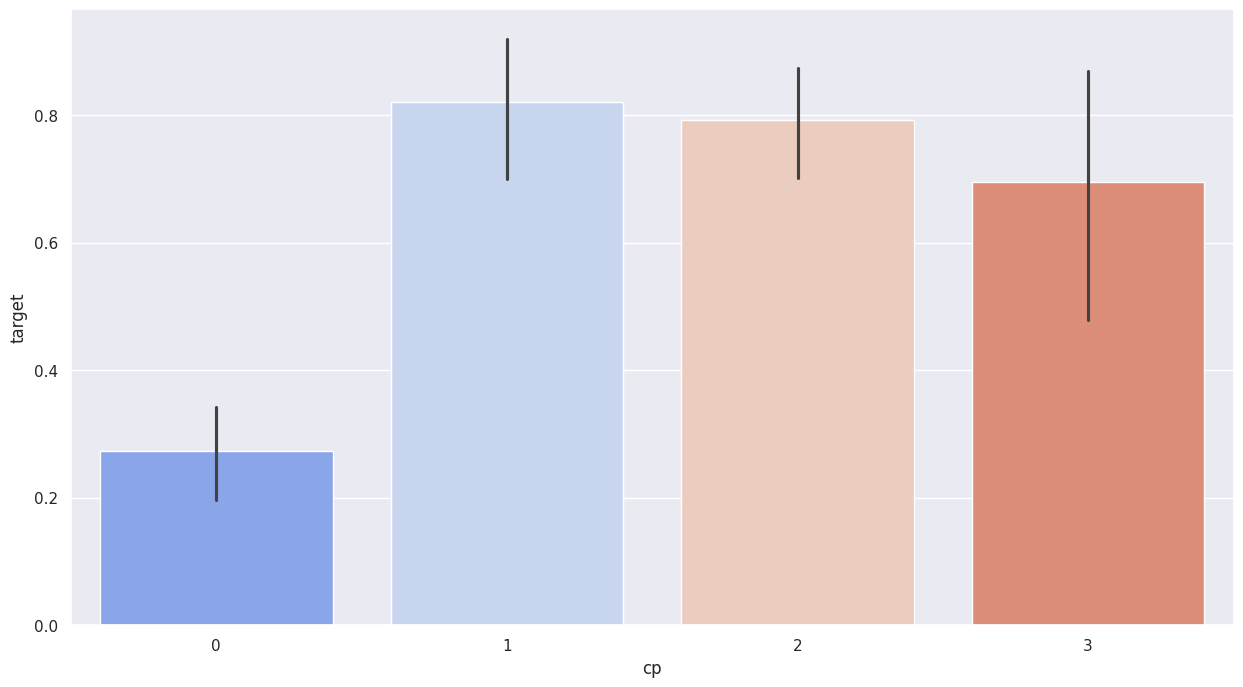

In [128]:
sns.barplot(x=dataset["cp"],y=y, palette="coolwarm")

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [129]:
dataset["fbs"].describe()

,fbs
count,303.000000
mean,0.148515
std,0.356198
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [130]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

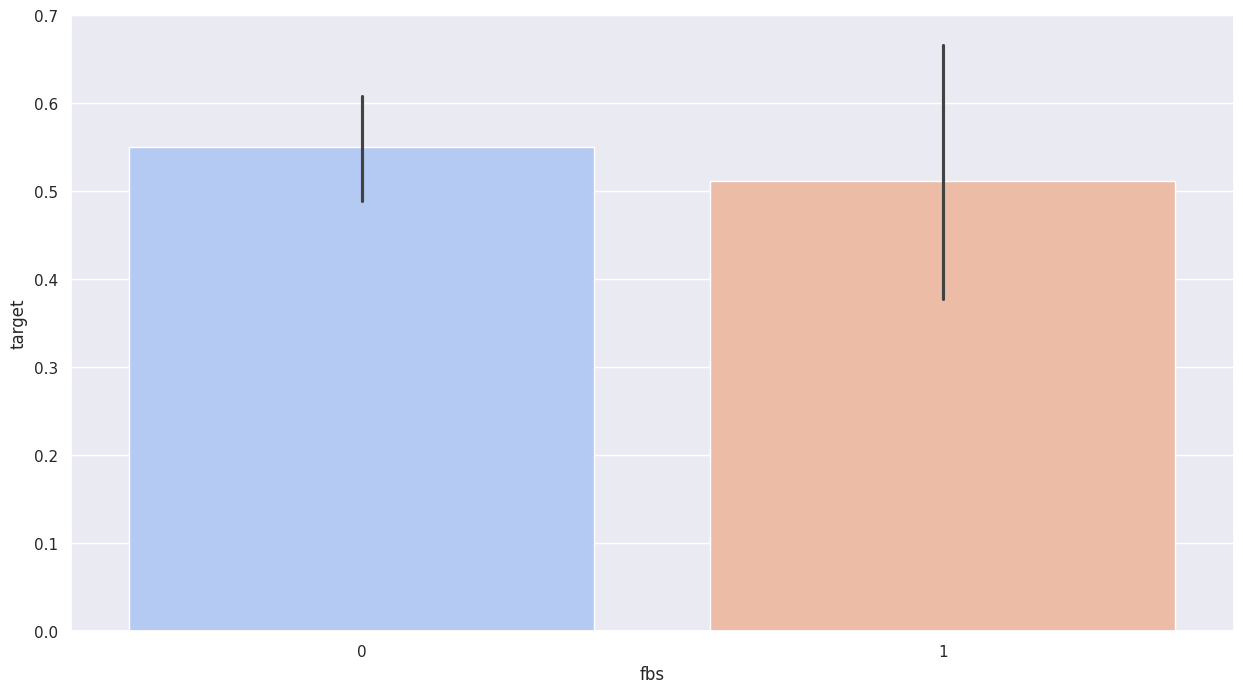

In [131]:
sns.barplot(x=dataset["fbs"],y=y, palette="coolwarm")

##### Nothing extraordinary here

### Analysing the restecg feature

In [132]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

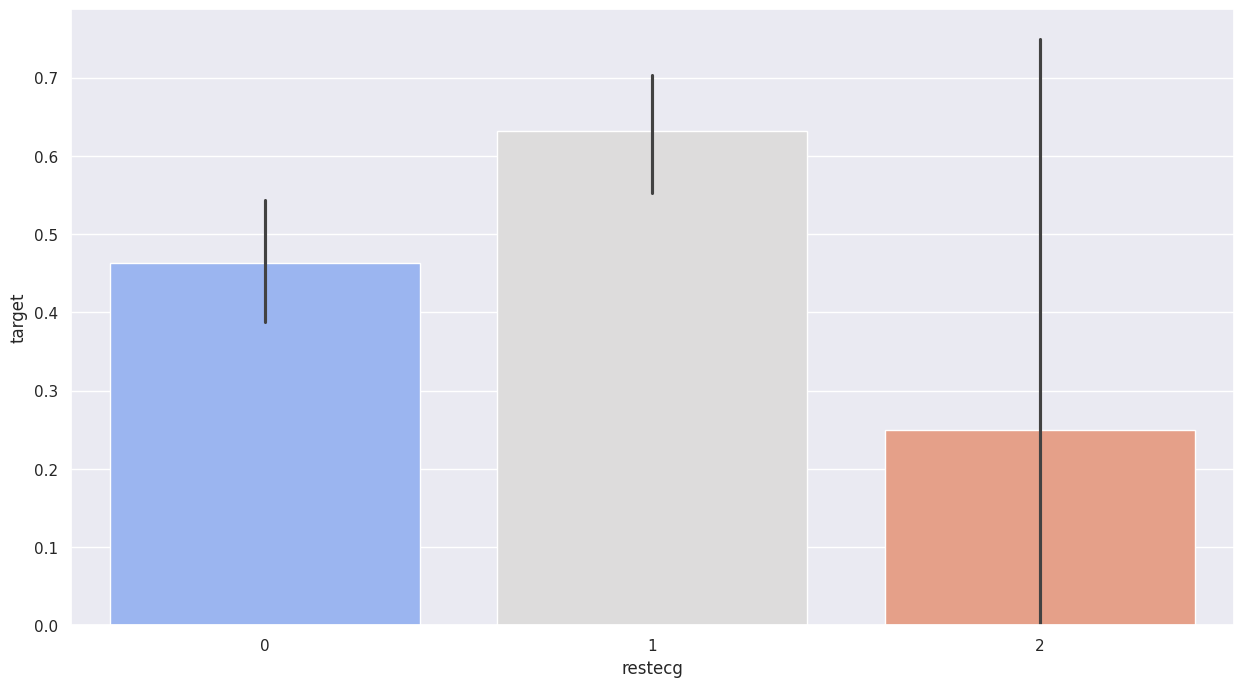

In [133]:
sns.barplot(x=dataset["restecg"],y=y, palette="coolwarm")

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [134]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

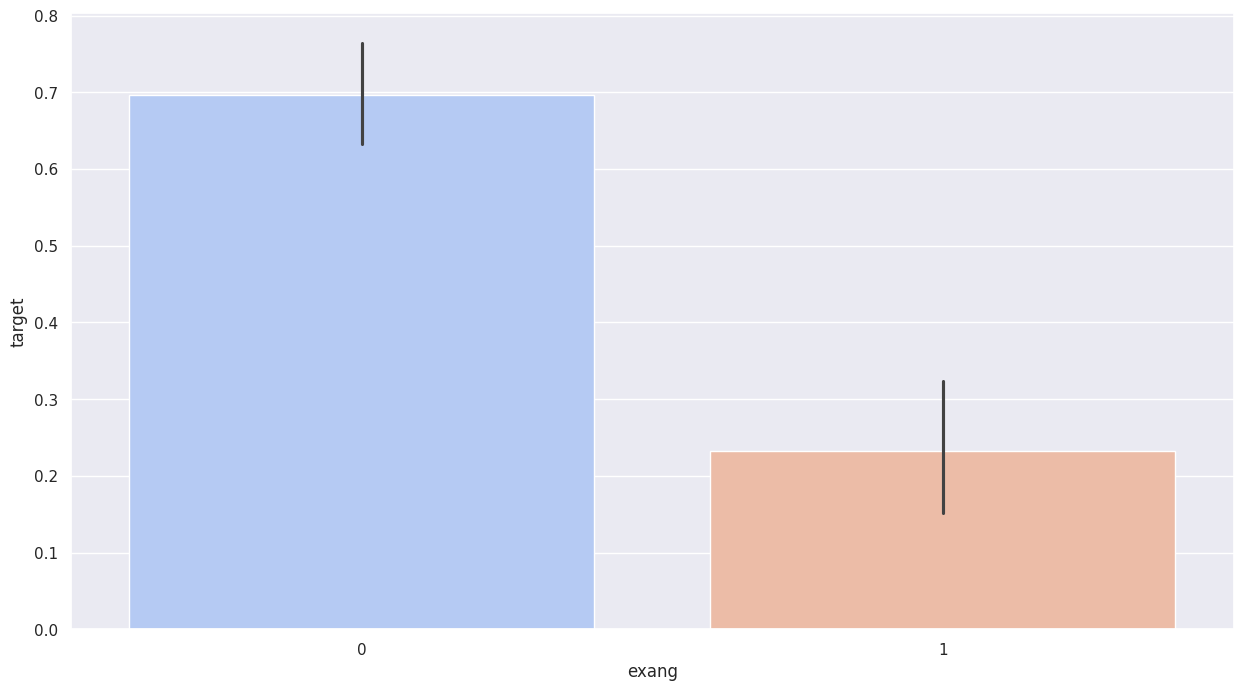

In [135]:
sns.barplot(x=dataset["exang"],y=y, palette="coolwarm")

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [136]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

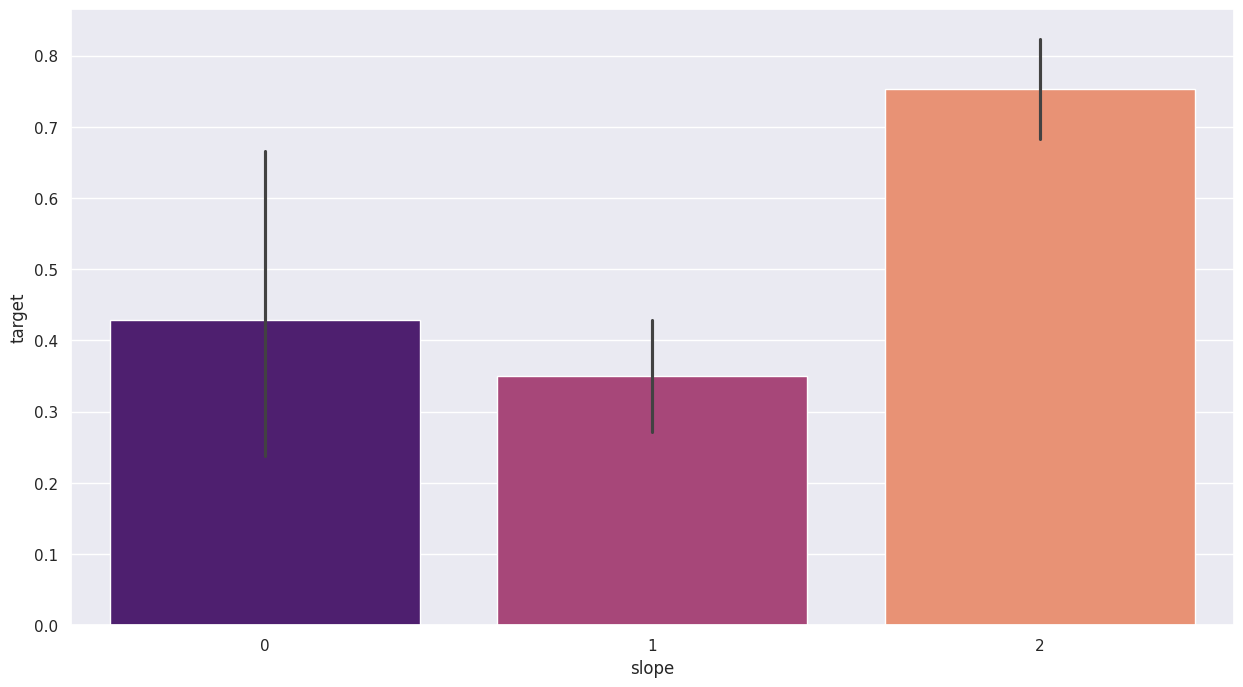

In [137]:
sns.barplot(x=dataset["slope"],y=y,palette="magma")

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

Number of major vessels (0-3) colored by flourosopy

In [138]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='count'>

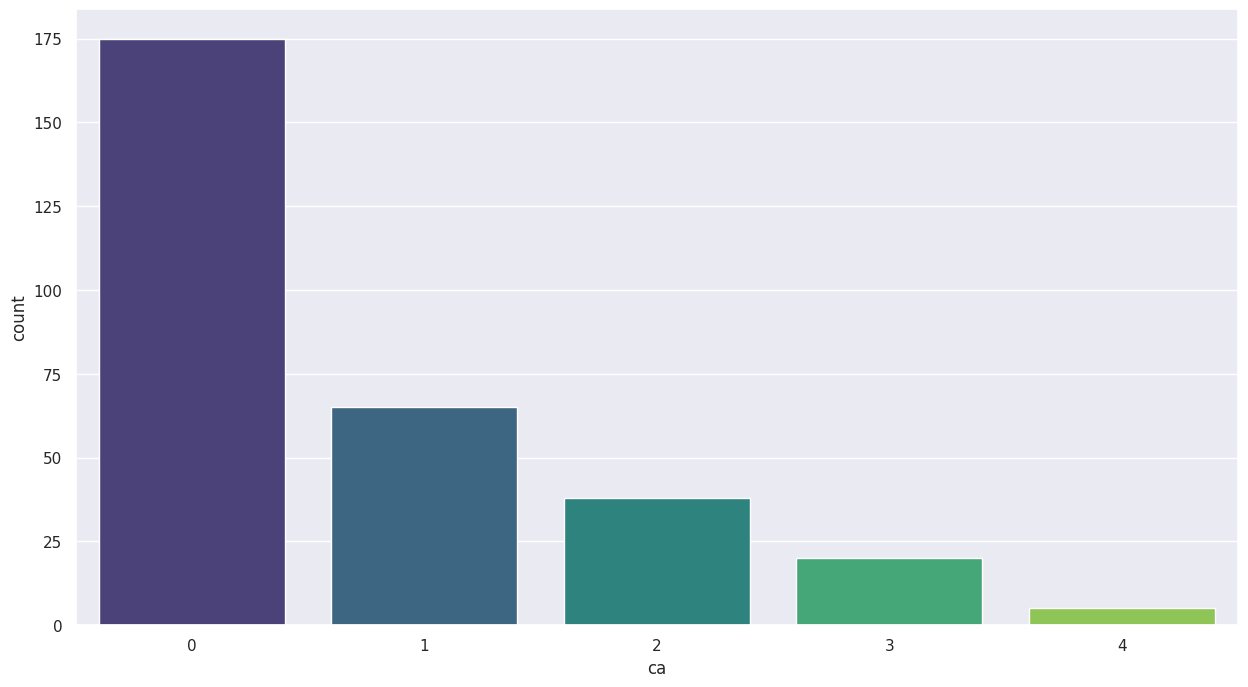

In [139]:
sns.countplot(x=dataset["ca"],palette="viridis")

<Axes: xlabel='ca', ylabel='target'>

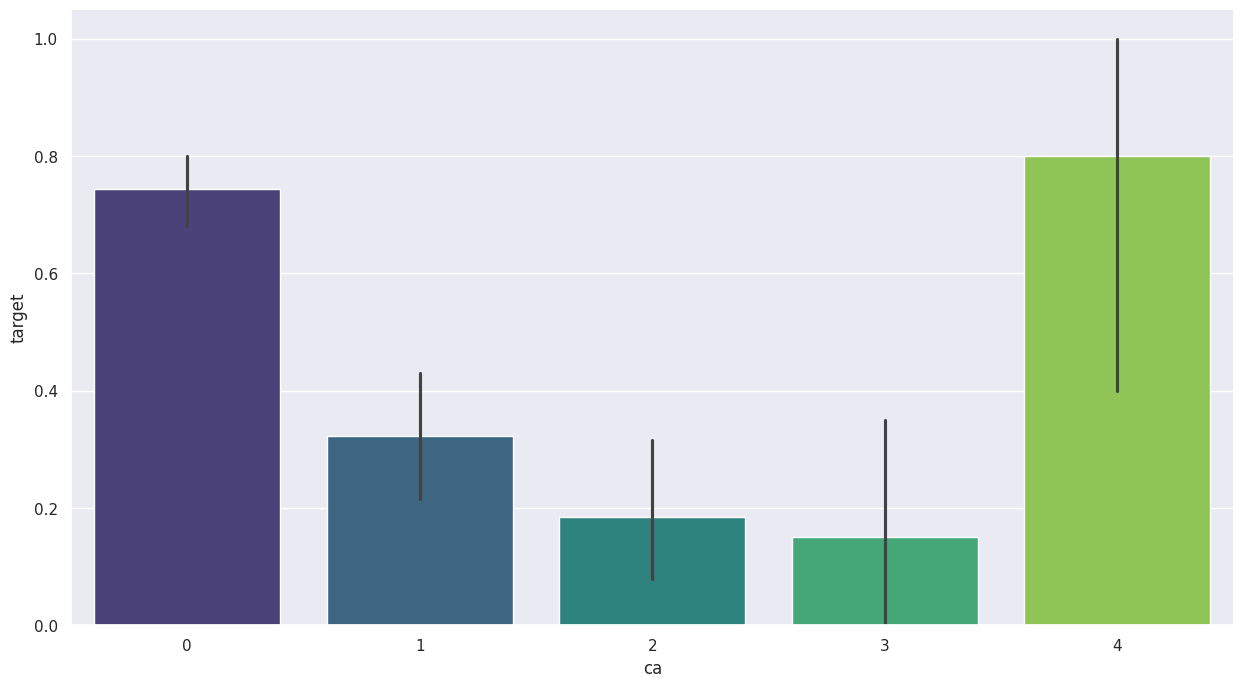

In [140]:
sns.barplot(x=dataset["ca"],y=y,palette="viridis")

ca=4 has astonishingly large number of heart patients

### Analysing the 'thal' feature

In [141]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

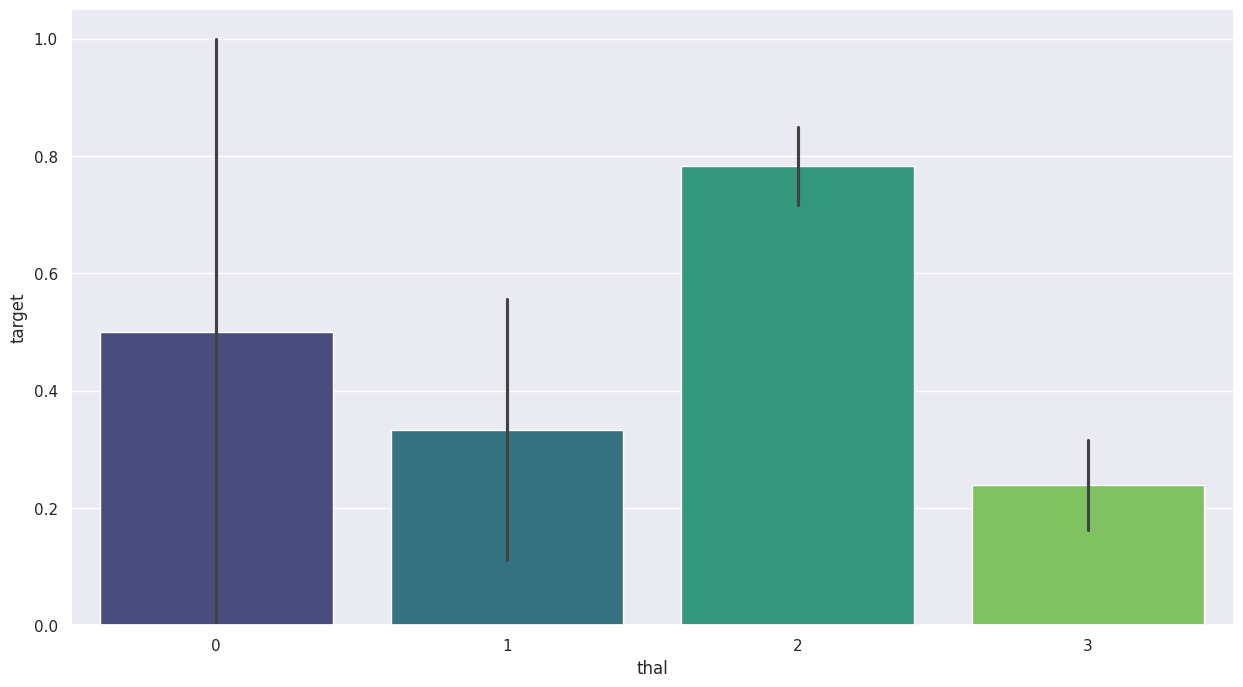

In [142]:
sns.barplot(x=dataset["thal"],y=y,palette="viridis")

<Axes: xlabel='thal', ylabel='Density'>

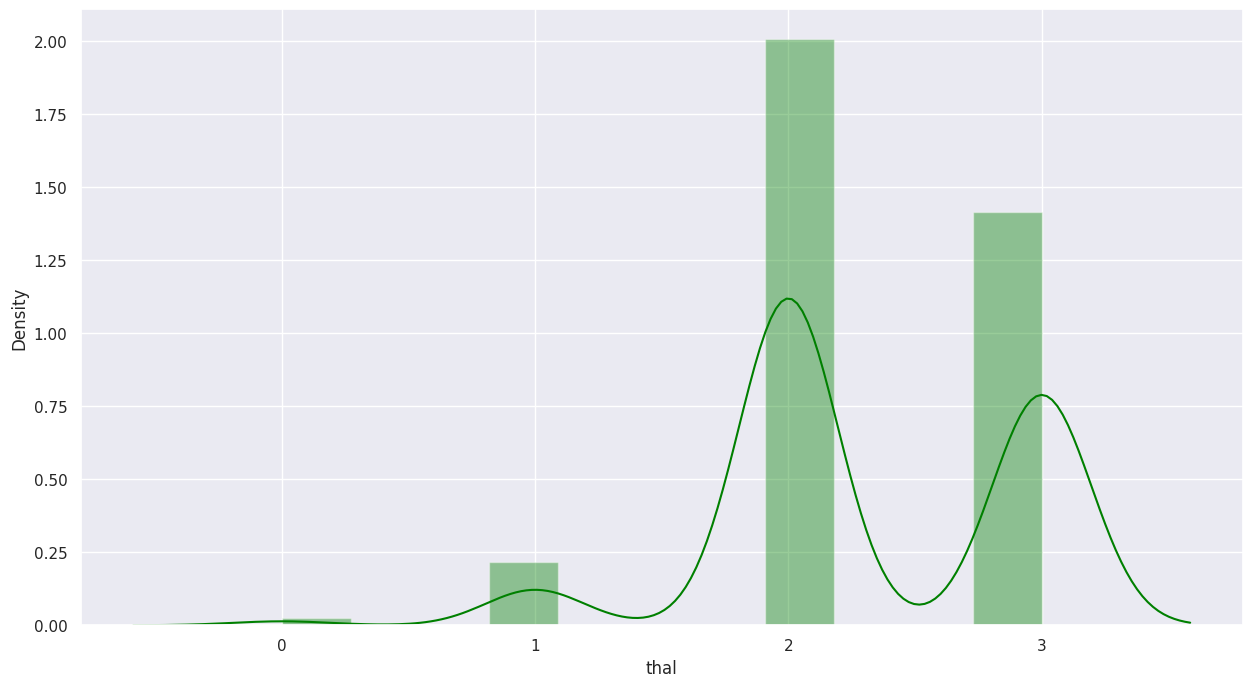

In [143]:
sns.distplot(dataset["thal"],color='green')

### Analysis of ignored features

#### Analyzing the oldpeak(ST depression induced by exercise relative to rest) feature

Analysis of 'oldpeak' feature
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


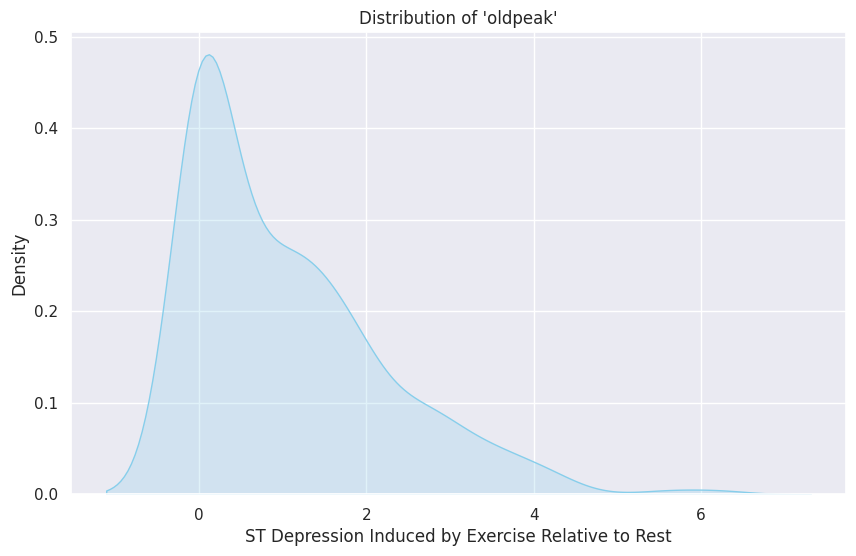

In [144]:
print("Analysis of 'oldpeak' feature")
print(dataset["oldpeak"].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x="oldpeak", fill=True, color="skyblue")
plt.title("Distribution of 'oldpeak'")
plt.xlabel("ST Depression Induced by Exercise Relative to Rest")
plt.ylabel("Density")
plt.show()

### Observing relationship between oldpeak and target

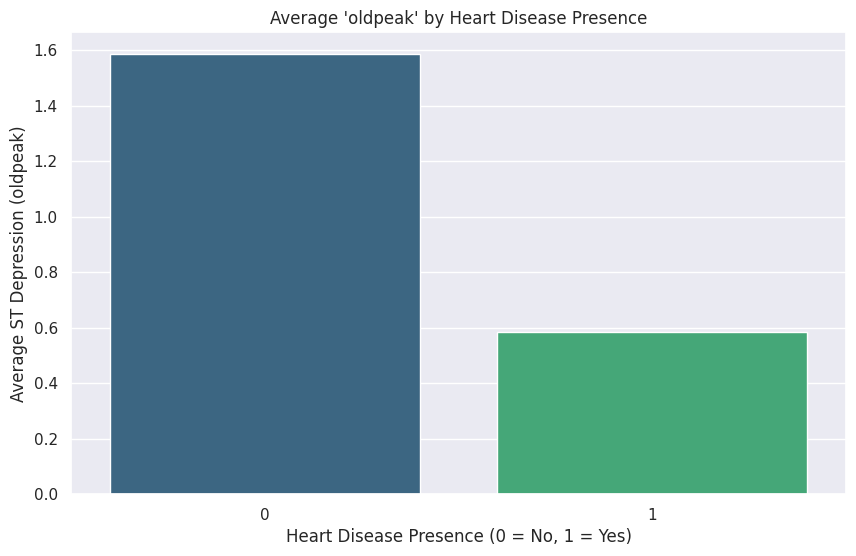

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=dataset["oldpeak"], ci=None, estimator=np.mean, palette="viridis")
plt.title("Average 'oldpeak' by Heart Disease Presence")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Average ST Depression (oldpeak)")
plt.show()



No distinctive observation.

### Analyzing the thalach (maximum heart rate achieved) feature


Analysis of 'thalach' feature
count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


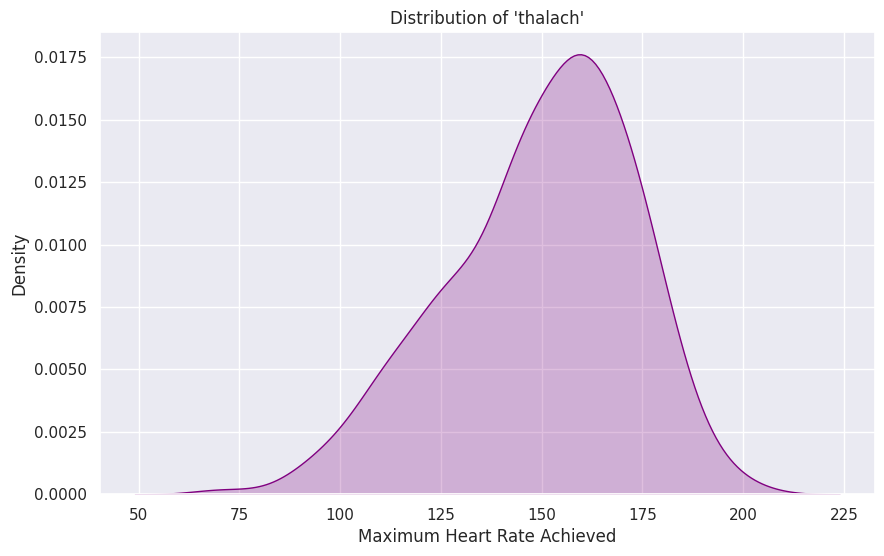

In [146]:
print("\nAnalysis of 'thalach' feature")
print(dataset["thalach"].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x="thalach", fill=True, color="purple")
plt.title("Distribution of 'thalach'")
plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Density")
plt.show()

### Observing relationship between thalach and target.

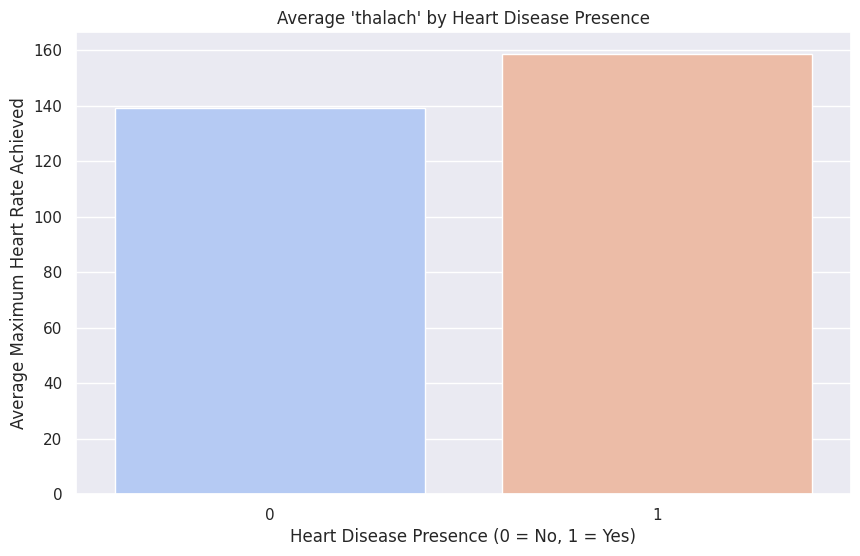

In [147]:
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=dataset["thalach"], ci=None, estimator=np.mean, palette="coolwarm")
plt.title("Average 'thalach' by Heart Disease Presence")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Average Maximum Heart Rate Achieved")
plt.show()


No distinctive observation.

###  Analyzing the trestbps (resting blood pressure) feature


Analysis of 'trestbps' feature
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


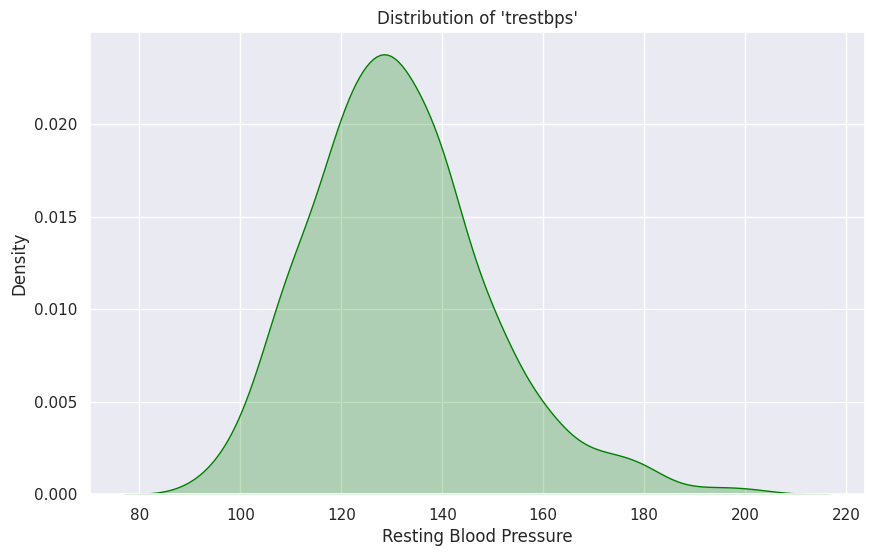

In [148]:
print("\nAnalysis of 'trestbps' feature")
print(dataset["trestbps"].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x="trestbps", fill=True, color="green")
plt.title("Distribution of 'trestbps'")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Density")
plt.show()

### Observing relationship between trestbps and target

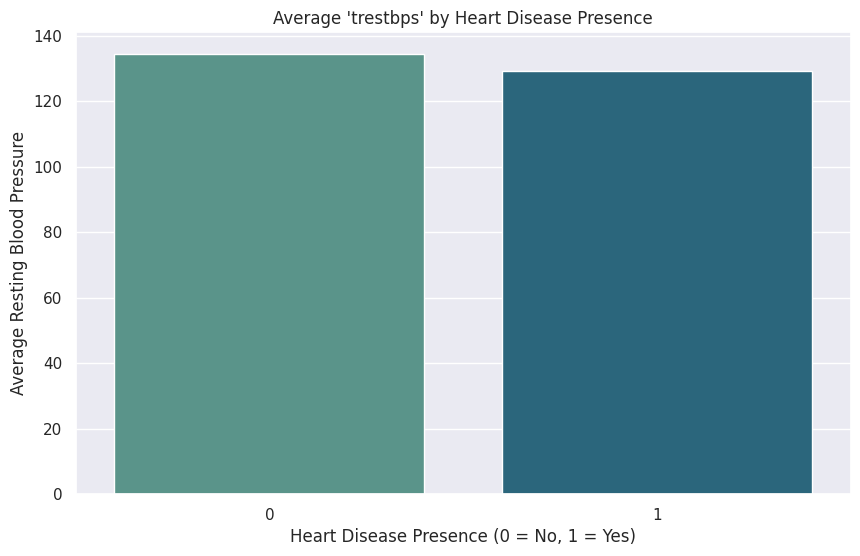

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=dataset["trestbps"], ci=None, estimator=np.mean, palette="crest")
plt.title("Average 'trestbps' by Heart Disease Presence")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Average Resting Blood Pressure")
plt.show()

No distinctive observation.

###  Analyzing the age feature


Analysis of 'age' feature
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


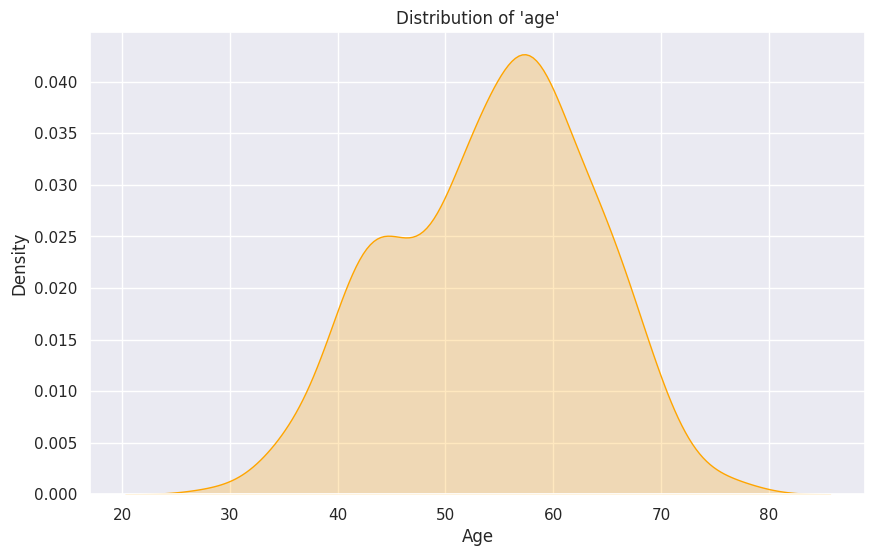

In [150]:
print("\nAnalysis of 'age' feature")
print(dataset["age"].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x="age", fill=True, color="orange")
plt.title("Distribution of 'age'")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

### Observing relationship between age and target

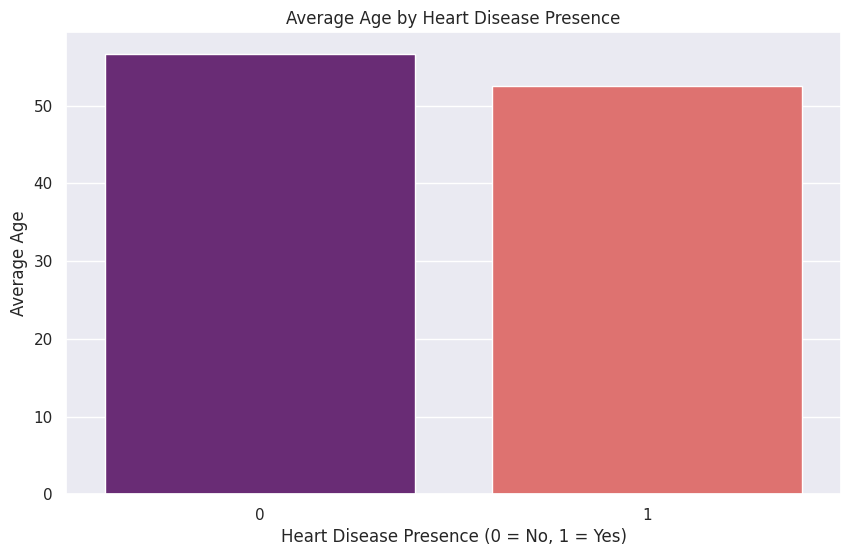

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=dataset["age"], ci=None, estimator=np.mean, palette="magma")
plt.title("Average Age by Heart Disease Presence")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Average Age")
plt.show()


No distinctive observation.

### Analyzing the chol (cholesterol) feature


Analysis of 'chol' feature
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


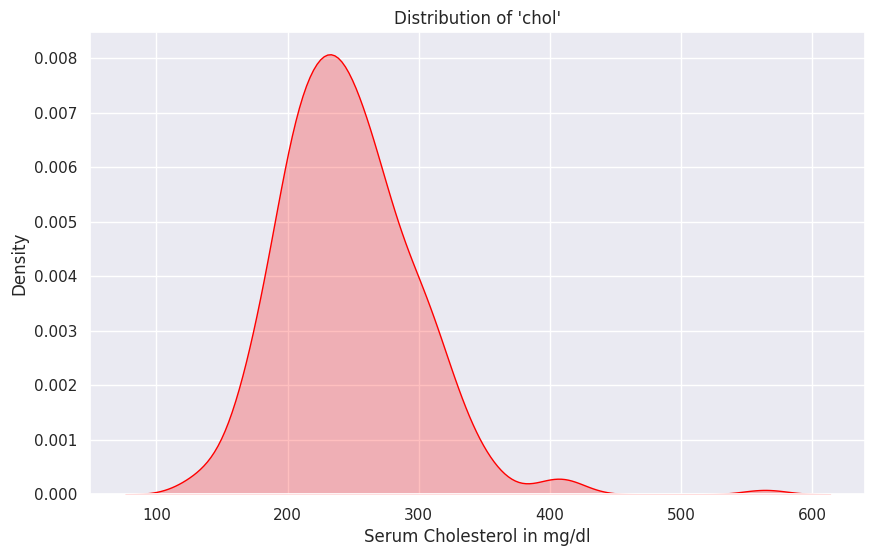

In [152]:

print("\nAnalysis of 'chol' feature")
print(dataset["chol"].describe())

plt.figure(figsize=(10, 6))
sns.kdeplot(data=dataset, x="chol", fill=True, color="red")
plt.title("Distribution of 'chol'")
plt.xlabel("Serum Cholesterol in mg/dl")
plt.ylabel("Density")
plt.show()

### Observing relationship between chol and target

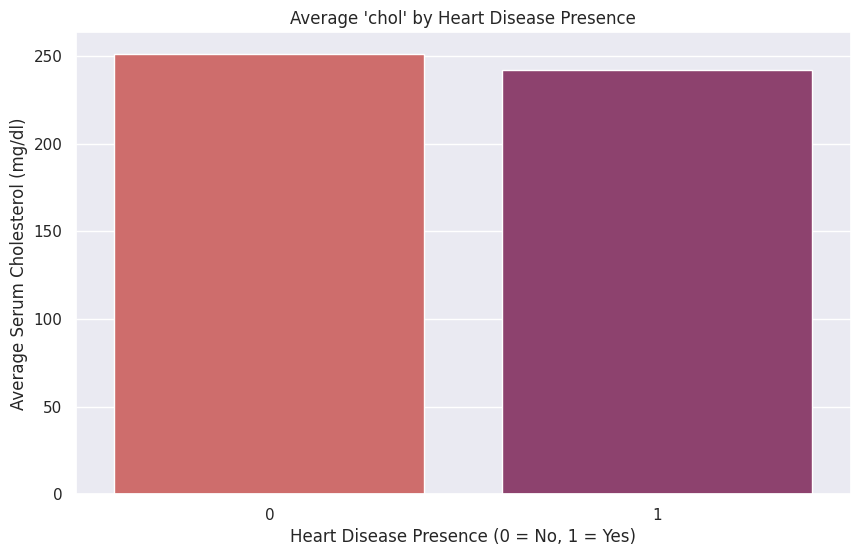

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(x=y, y=dataset["chol"], ci=None, estimator=np.mean, palette="flare")
plt.title("Average 'chol' by Heart Disease Presence")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Average Serum Cholesterol (mg/dl)")
plt.show()

No distinctive observation.

## IV. Train Test split

In [154]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [155]:
X_train.shape

(242, 13)

In [156]:
X_test.shape

(61, 13)

In [157]:
Y_train.shape

(242,)

In [158]:
Y_test.shape

(61,)

## V. Model Fitting

In [159]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [161]:
Y_pred_lr.shape

(61,)

In [162]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [163]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [164]:
Y_pred_nb.shape

(61,)

In [165]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [166]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [167]:
Y_pred_svm.shape

(61,)

In [168]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [169]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [170]:
Y_pred_knn.shape

(61,)

In [171]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x



dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [173]:
print(Y_pred_dt.shape)

(61,)


In [174]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [176]:
Y_pred_rf.shape

(61,)

In [177]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


### XGBoost

In [178]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [179]:
Y_pred_xgb.shape

(61,)

In [180]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


## VI. Output final score

In [181]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

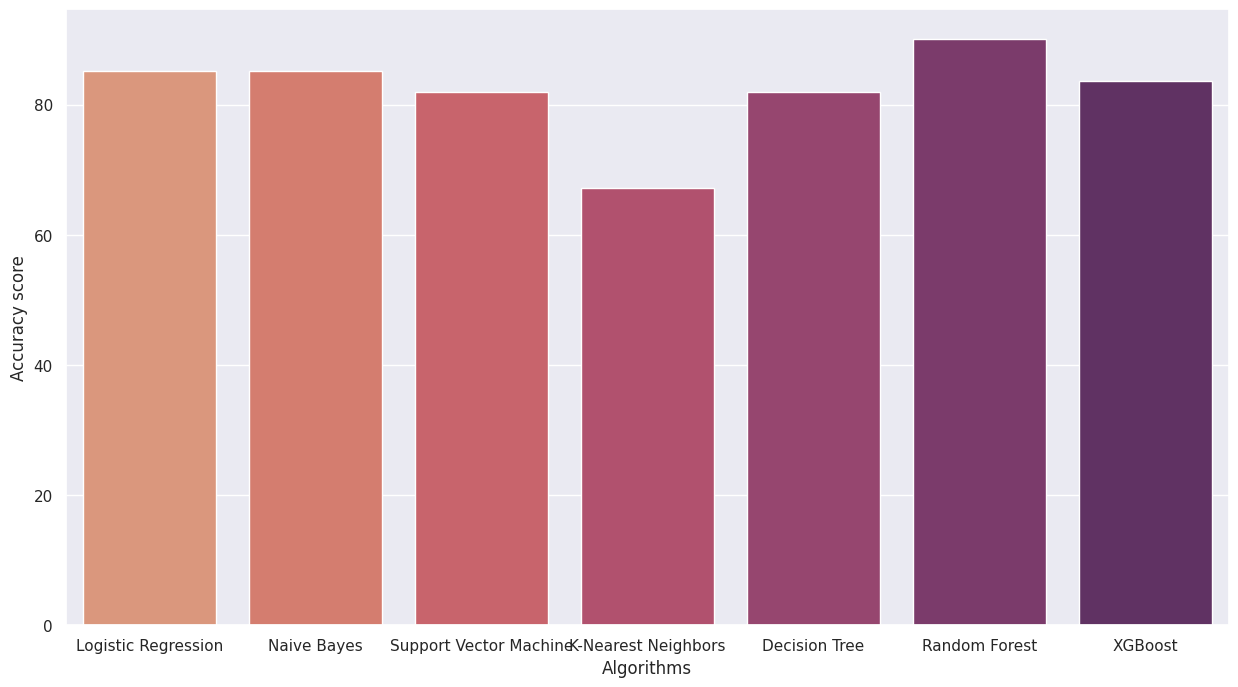

In [182]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores,palette="flare")

## Final Result : Out of all models implemented Random Forest is the most accurate for prediction.